# Data Augmentation

If you need many images to train a model for image recognition, you can use data augmentation to generate multiple images out of one.

## Installation

We use [albumentations](https://albumentations.ai/) for data augmentation.

In [109]:
!pip install albumentations

/home/main/.local/lib/python3.9/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/main/.local/lib/python3.9/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


## Import necessary modules

We use [matplotlib](https://matplotlib.org/) to visualize images for this notebook.

In [110]:
import cv2
from albumentations import *
from matplotlib import pyplot as plt

## Define help functions

### visualize

In [111]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

### resize

In [112]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation = inter)

## Creation of 61 variants of the original image

Load the original image. [For historical reasons](https://learnopencv.com/why-does-opencv-use-bgr-color-format/), OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.

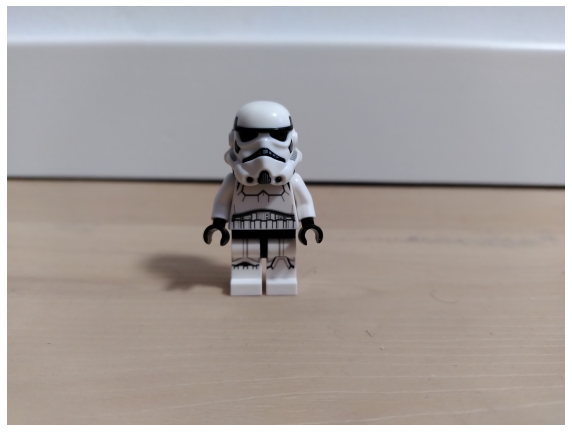

In [113]:
image = cv2.imread('../data/images/stormtrooper.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

First we resize the image and then we apply the following augmentations:

(original) image -> resized_image


|                   | resized image     | vertical flip         | horizontal flip       | elastic transformation    | rotation          |
| -                 | -                 | -                     | -                     | -                         | -                 |
| **alpha**         | a_resized_image   | a_vf_resized_image    | a_hf_resized_image    | a_et_resized_image        | a_r_resized_image |
| **brightness**    | b_resized_image   |
| **greyscale**     | g_resized_image   |
| **sepia**         | s_resized_image   |
| **blur**          | bl_resized_image  |
| **noise**         | n_resized_image   |
| **jpeg**          | j_resized_image   |
| **channel**       | c_resized_image   | 
| **snow**          | sn_resized_image  |
| **fog**           | f_resized_image   |
| **saturation**    | sa_resized_image  |
| **clahe**         | cl_resized_image  |

### Resized Image

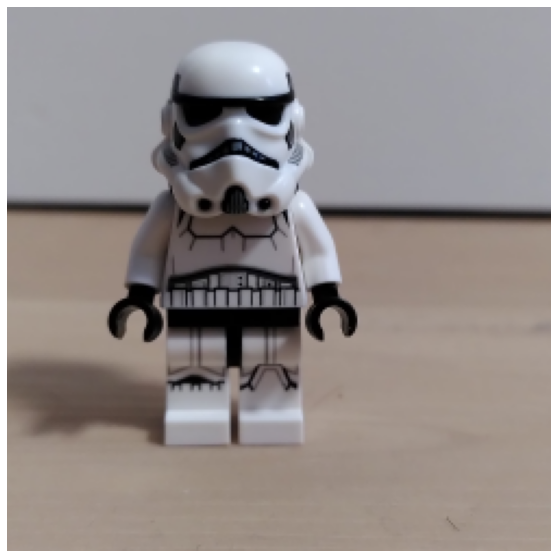

In [114]:
resized_image = resize(image, height=400)
transform = CenterCrop(250,250, p=1.0)
resized_image = transform.apply(resized_image)
visualize(resized_image)

#### Alpha

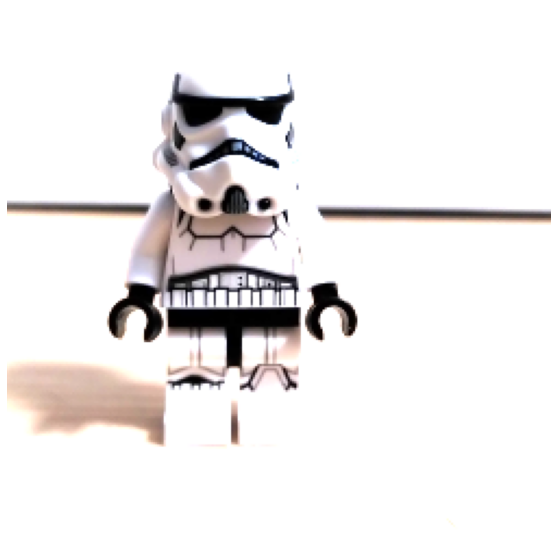

In [115]:
alpha = 2.2
transform = RandomContrast(p=1)
a_resized_image = transform.apply(resized_image, alpha=alpha)
visualize(a_resized_image)

#### Brightness

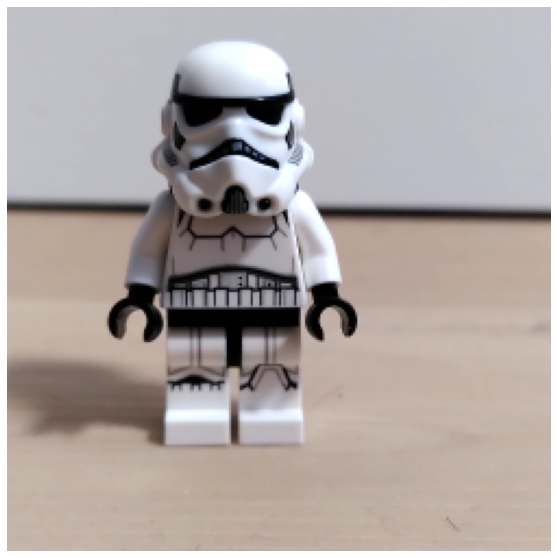

In [116]:
alpha = 1.2
transform = RandomBrightness(p=1)
a_resized_image = transform.apply(resized_image, alpha=alpha)
visualize(a_resized_image)

#### Greyscale

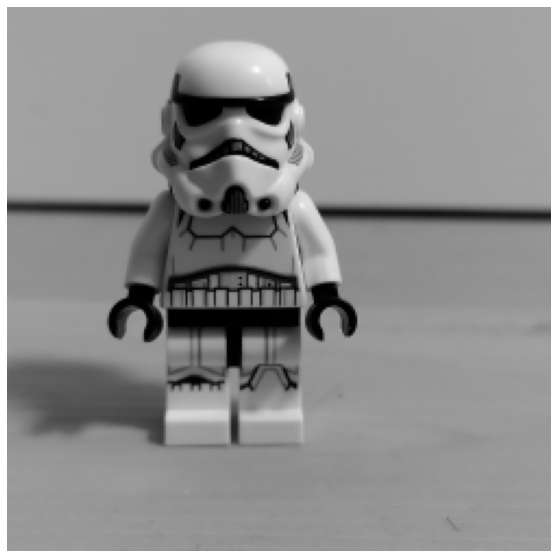

In [117]:
transform = ToGray(p=0.5)
g_resized_image = transform.apply(resized_image)
visualize(g_resized_image)

#### Sepia

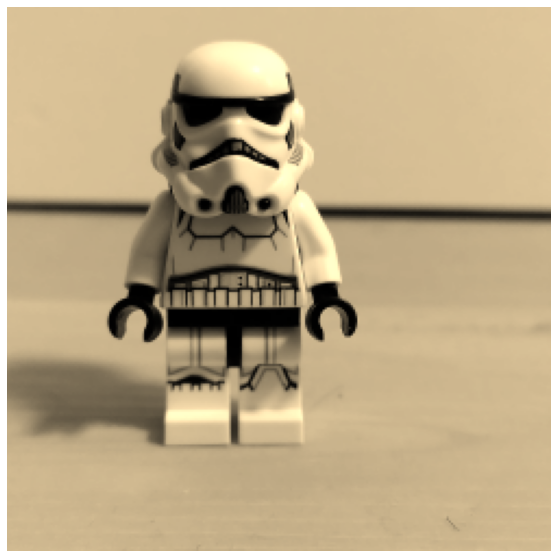

In [118]:
transform = ToSepia(p=0.5)
s_resized_image = transform.apply(resized_image)
visualize(s_resized_image)

#### Blur

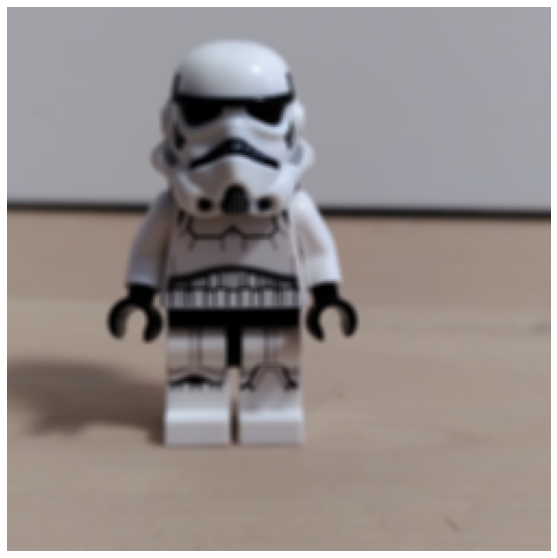

In [119]:
transform = Blur(p=0.5, blur_limit=7)
bl_resized_image = transform.apply(resized_image)
visualize(bl_resized_image)

#### Noise

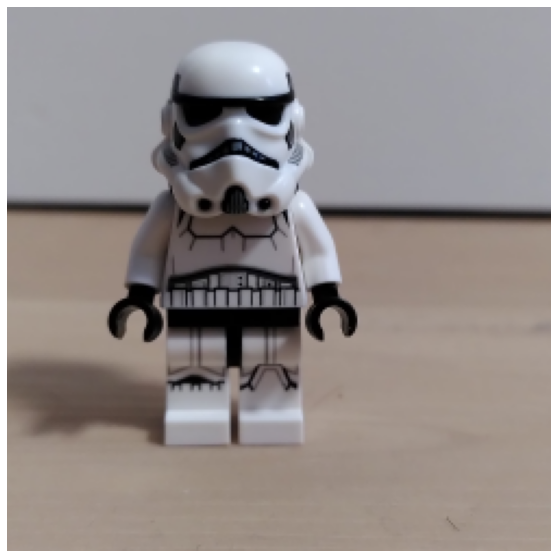

In [120]:
transform = MultiplicativeNoise(always_apply=True, elementwise=True, multiplier=(0.9, 1.1), p=1.0)
n_resized_image = transform.apply(resized_image)
visualize(n_resized_image)

#### JPEG

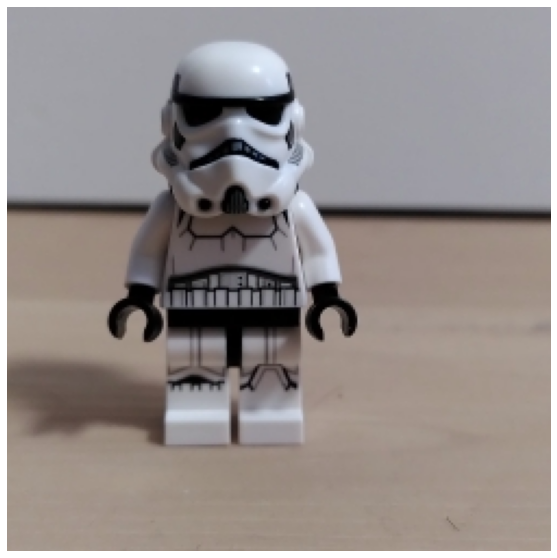

In [121]:
transform = JpegCompression(quality_lower=0, quality_upper=1, p=1)
j_resized_image = transform.apply(resized_image)
visualize(j_resized_image)

#### channel

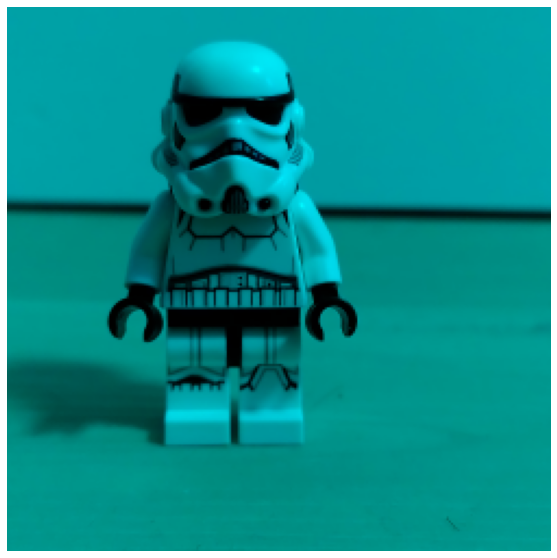

In [122]:
transform = ChannelDropout(channel_drop_range=(1, 1), fill_value=0, p=1)
c_resized_image = transform.apply(resized_image)
visualize(c_resized_image)

#### Snow

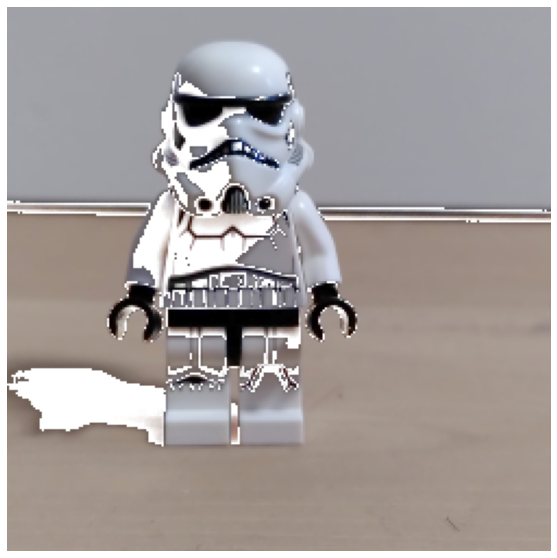

In [123]:
transform = RandomSnow(p=1, brightness_coeff=3.5, snow_point_lower=0.5, snow_point_upper=0.8)
sn_resized_image = transform.apply(resized_image)
visualize(sn_resized_image)

#### Fog

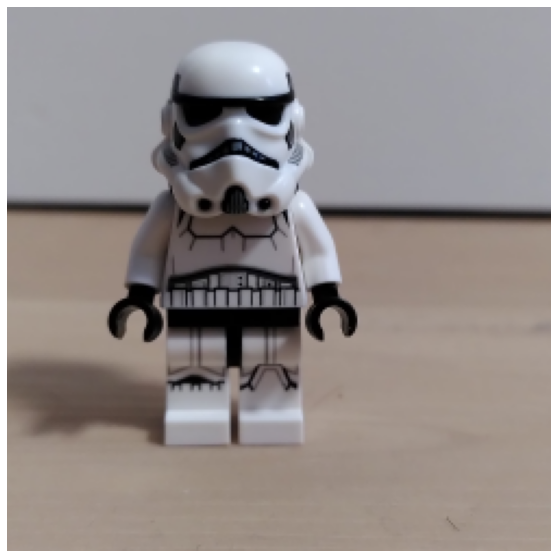

In [124]:
transform = RandomFog(p=1, fog_coef_lower=0.1, fog_coef_upper=0.1, alpha_coef=0.8)
f_resized_image = transform.apply(resized_image)
visualize(f_resized_image)

#### Saturation

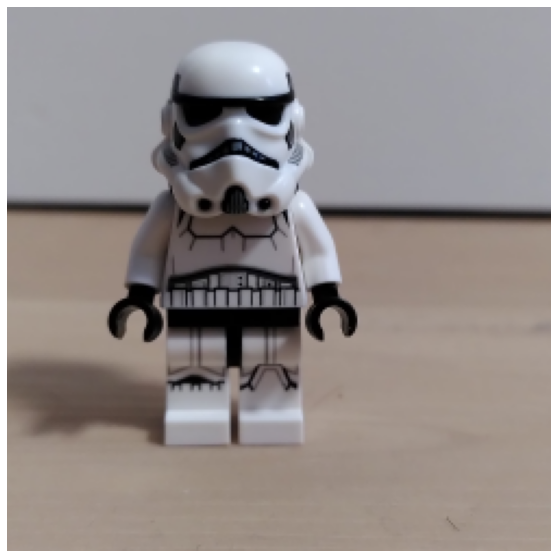

In [125]:
transform = HueSaturationValue(hue_shift_limit=200, sat_shift_limit=70, val_shift_limit=27, p=1)
sa_resized_image = transform.apply(resized_image)
visualize(sa_resized_image)

#### CLAHE

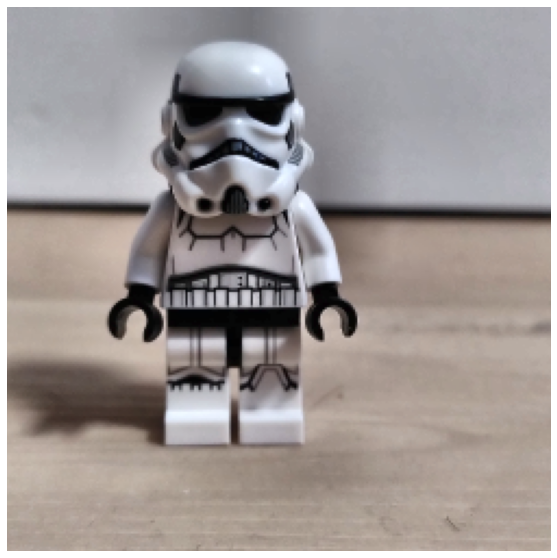

In [126]:
transform = CLAHE(p=1.0)
cl_resized_image = transform.apply(resized_image)
visualize(cl_resized_image)

### Vertical Flip

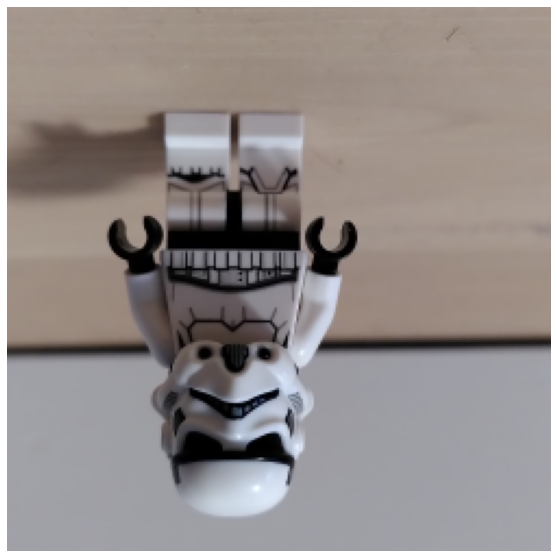

In [127]:
transform = VerticalFlip(p=1)
vf_resized_image = transform.apply(resized_image)
visualize(vf_resized_image)

### Horizontal Flip

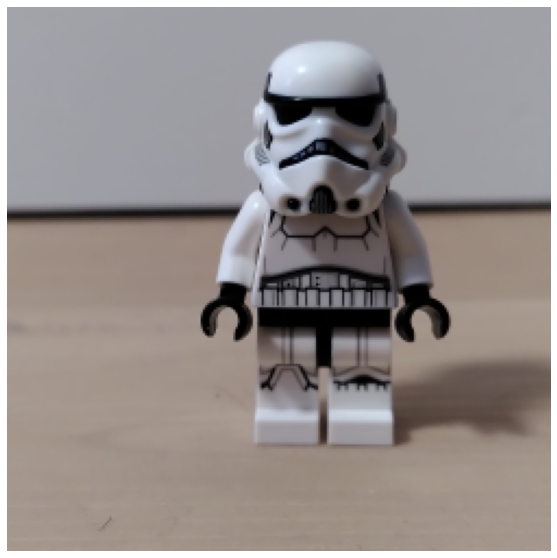

In [128]:
transform = HorizontalFlip(p=1)
hf_resized_image = transform.apply(resized_image)
visualize(hf_resized_image)

### Elastic Transformation

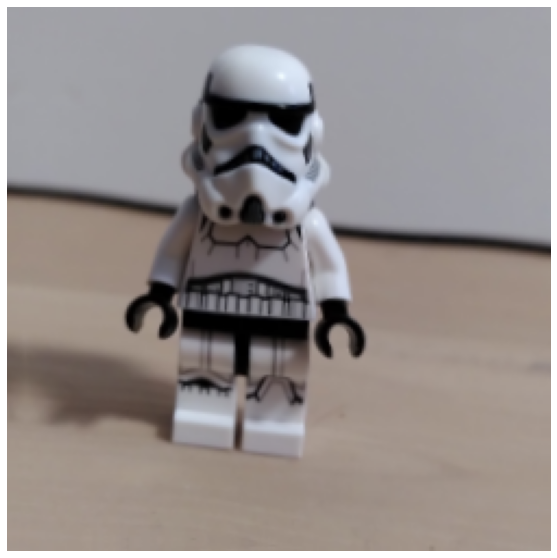

In [129]:
transform = ElasticTransform(alpha=203, sigma=25, alpha_affine=25, p=1.0)
et_resized_image = transform.apply(resized_image)
visualize(et_resized_image)

### Rotation

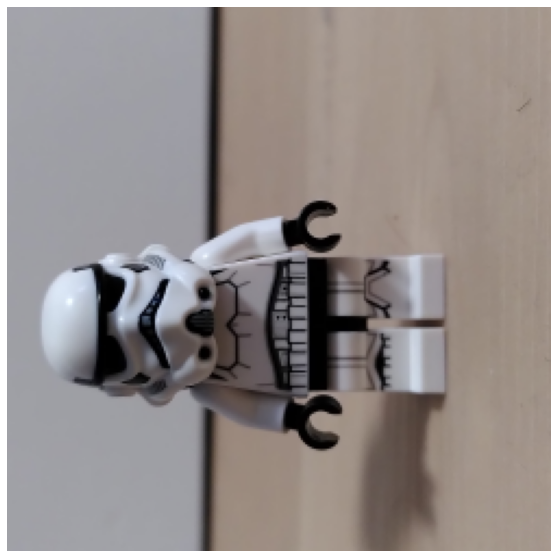

In [130]:
angle = 90 
transform = RandomRotate90(p=0.5)
r_resized_image = transform.apply(resized_image, factor=angle // 90)
visualize(r_resized_image)